In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [2]:
#link lengths (in mm)
l5 = 85  
l6 = 20   
l7 = 70   
l8 = 60 
l10 = 50
l11 = 20  

In [3]:
#angular velocity of the crank (rad/s)
omega6 = 10  #equal to omega2, as both wheels are driven via the same drawstring
alpha6 = 0  #Constant omega2

In [4]:
#inclination angles 
beta5 = np.radians(70)
beta11 = np.radians(90)  

In [5]:
#initialize arrays for storing results
theta6_vals = np.linspace(0, 2*np.pi, 100)  #crank angles from 0 to 360 degrees
theta7_vals = []
theta8_vals = []
omega7_vals = []
omega8_vals = []
alpha7_vals = []
alpha8_vals = []

In [6]:
s_vals = [] 
theta10_vals = []
v_vals = []
omega10_vals = []
a_vals = []
alpha10_vals = []

In [7]:
#function to solve displacement equations for Rear Leg Mechanism
def equations(vars, theta6, l6, l7, l8,l5, beta):
    theta7, theta8 = vars
    eq1 = l6 * np.cos(theta6) - l7 * np.cos(theta7) - l8 * np.cos(theta8) - l5 * np.cos(beta)
    eq2 = l6 * np.sin(theta6) - l7 * np.sin(theta7) - l8 * np.sin(theta8) - l5 * np.sin(beta)
    return [eq1, eq2]

In [8]:
#function to compute acceleration equations Rear Leg Mechanism
def compute_equations(vars1, l6, l7, l8, theta6, theta7, theta8, omega6, omega7, omega8,alpha6):
    alpha7, alpha8 = vars1
    acc1 = -l8 * (np.cos(theta8) * omega8**2 + alpha8 * np.sin(theta8)) - \
           l7 * (np.cos(theta7) * omega7**2 + alpha7 * np.sin(theta7)) + \
           l6 * (np.cos(theta6) * omega6**2 + alpha6 * np.sin(theta6))
    
    acc2 = l8 * (-np.sin(theta8) * omega8**2 + np.cos(theta8) * alpha8) + \
           l7 * (-np.sin(theta7) * omega7**2 + np.cos(theta7) * alpha7) - \
           l6 * (-np.sin(theta6) * omega6**2 + np.cos(theta6) * alpha6)
    
    return [acc1, acc2]

In [9]:
#Slotted Link Mechanism Analysis
def displacement_equations(vars, l10, l11, beta11, theta8):
    s, theta10 = vars
    dis_eq1 = l11 * np.cos(beta11) + l10 * np.cos(theta10) - s * np.cos(theta8)
    dis_eq2 = l11 * np.sin(beta11) + l10 * np.sin(theta10) - s * np.sin(theta8)
    return [dis_eq1, dis_eq2]

In [10]:
def velocity_equations(vars, l10, s, theta10, theta8, omega8):
    omega10, v = vars
    vel_eq1 = -l10 * np.sin(theta10) * omega10 - v * np.cos(theta8) + s * np.sin(theta8) * omega8
    vel_eq2 = l10 * np.cos(theta10) * omega10 - v * np.sin(theta8) - s * np.cos(theta8) * omega8
    return [vel_eq1, vel_eq2]

In [11]:
def acceleration_equations(vars, l10, s, theta10, theta8, omega10, omega8, alpha8, v):
    alpha10, a = vars
    acc_eq1 = (-l10 * (np.cos(theta10) * omega10**2 + np.sin(theta10) * alpha10)
               - (a * np.cos(theta8) - v * omega8 * np.sin(theta8) + (v * np.sin(theta8) * omega8 + s * np.cos(theta8) * omega8**2 + s * np.sin(theta8) * alpha8)))
    acc_eq2 = (l10 * (-np.sin(theta10) * omega10**2 + np.cos(theta10) * alpha10)
               - (a * np.sin(theta8) + v * omega8 * np.cos(theta8) - (v * np.cos(theta8) * omega8 - s * np.sin(theta8) * omega8**2 + s * np.cos(theta8) * alpha8)))
    return [acc_eq1, acc_eq2]

In [12]:
#loop through crank angles
for theta6 in theta6_vals:
    #displacement analysis of rear leg mechanism
    initial_guess = [np.radians(290), np.radians(200)]
    theta7, theta8 = fsolve(equations, initial_guess, args=(theta6, l6, l7, l8,l5, beta5))
    theta7_vals.append(theta7)
    theta8_vals.append(theta8)

    #velocity analysis of rear leg mechanism
    omega7 = (l6 * omega6 * np.sin(theta6 - theta8)) / (l7 * np.sin(theta7 - theta8))
    omega8 = (l6 * omega6 * np.sin(theta6 - theta7)) / (l8 * np.sin(theta8 - theta7))
    
    omega7_vals.append(omega7)
    omega8_vals.append(omega8)

    #acceleration analysis of rear leg mechanism
    ini_guess_acc = [15, 20]
    alpha7, alpha8 = fsolve(compute_equations, ini_guess_acc, args=(l6, l7, l8, theta6, theta7, theta8, omega6, omega7, omega8,alpha6))
    
    alpha7_vals.append(alpha7)
    alpha8_vals.append(alpha8)

    #Slotted link analysis
    initial_guess_slider = [35, np.radians(200)]
    s, theta10 = fsolve(displacement_equations, initial_guess_slider, args=(l10, l11, beta11, theta8))
    s_vals.append(s)
    theta10_vals.append(theta10)

    ini_guess_vel_slider = [10, 15]
    omega10, v = fsolve(velocity_equations, ini_guess_vel_slider, args=(l10, s, theta10, theta8, omega8))
    v_vals.append(v)
    omega10_vals.append(omega10)

    ini_guess_acc_slider = [10, 100]
    alpha10, a = fsolve(acceleration_equations, ini_guess_acc_slider, args=(l10, s, theta10, theta8, omega10, omega8, alpha8, v))
    alpha10_vals.append(alpha10)
    a_vals.append(a)

In [13]:
#convert angles to degrees for plotting
theta6_vals_deg = np.degrees(theta6_vals)
theta7_vals_deg = np.degrees(theta7_vals)
theta8_vals_deg = np.degrees(theta8_vals)
theta10_vals_deg = np.degrees(theta10_vals)

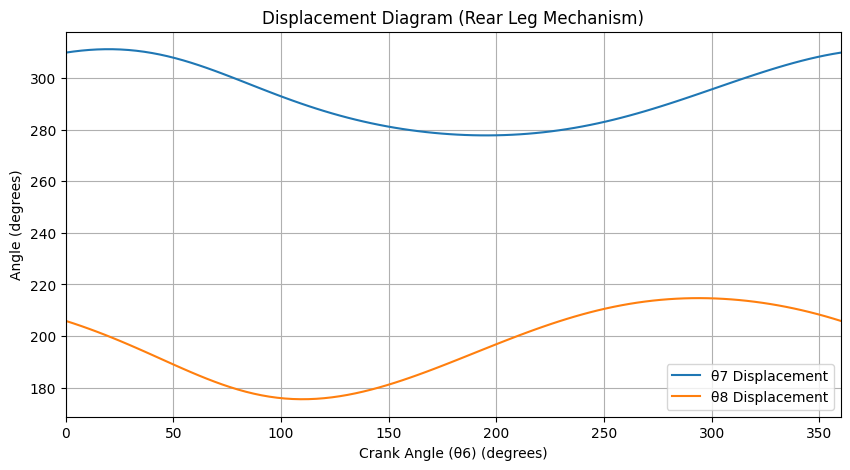

In [14]:
#plot displacement diagram of rear leg mechanism
plt.figure(figsize=(10, 5))
plt.plot(theta6_vals_deg, theta7_vals_deg, label='θ7 Displacement')
plt.plot(theta6_vals_deg, theta8_vals_deg, label='θ8 Displacement')
plt.xlim(0,360)
plt.xlabel("Crank Angle (θ6) (degrees)")
plt.ylabel("Angle (degrees)")
plt.title("Displacement Diagram (Rear Leg Mechanism)")
plt.legend()
plt.grid()
plt.savefig('mech2_dis.png', format='png')
plt.show()

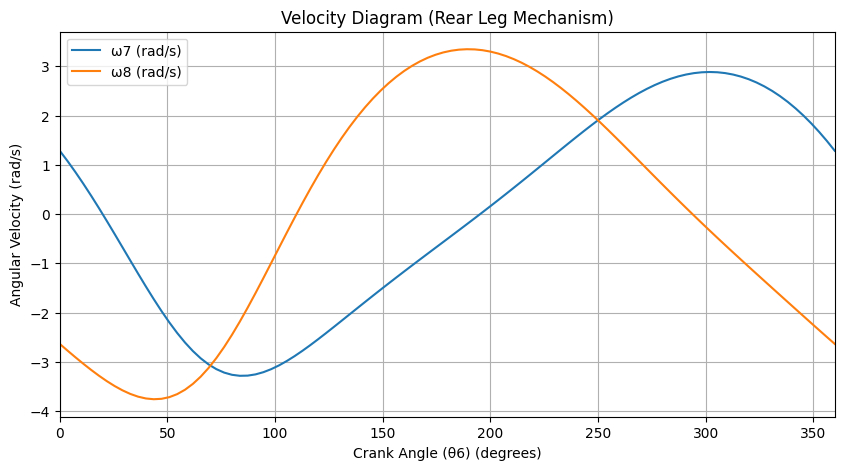

In [15]:
#plot velocity diagram of rear leg mechanism
plt.figure(figsize=(10, 5))
plt.plot(theta6_vals_deg, omega7_vals, label='ω7 (rad/s)')
plt.plot(theta6_vals_deg, omega8_vals, label='ω8 (rad/s)')
plt.xlim(0,360)
plt.xlabel("Crank Angle (θ6) (degrees)")
plt.ylabel("Angular Velocity (rad/s)")
plt.title("Velocity Diagram (Rear Leg Mechanism)")
plt.legend()
plt.grid()
plt.savefig('mech2_vel.png', format='png')
plt.show()

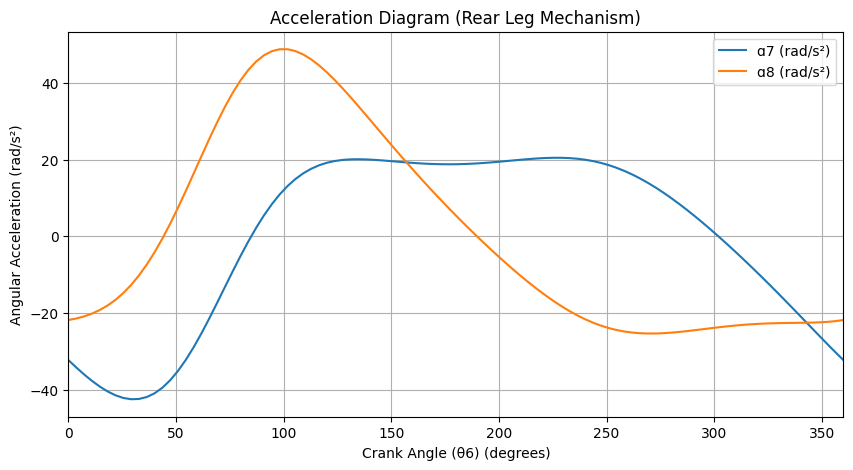

In [16]:
#plot acceleration diagram of rear leg mechanism
plt.figure(figsize=(10, 5))
plt.plot(theta6_vals_deg, alpha7_vals, label='ɑ7 (rad/s²)')
plt.plot(theta6_vals_deg, alpha8_vals, label='ɑ8 (rad/s²)')
plt.xlim(0,360)
plt.xlabel("Crank Angle (θ6) (degrees)")
plt.ylabel("Angular Acceleration (rad/s²)")
plt.title("Acceleration Diagram (Rear Leg Mechanism)")
plt.legend()
plt.grid()
plt.savefig('mech2_acc.png', format='png')
plt.show()

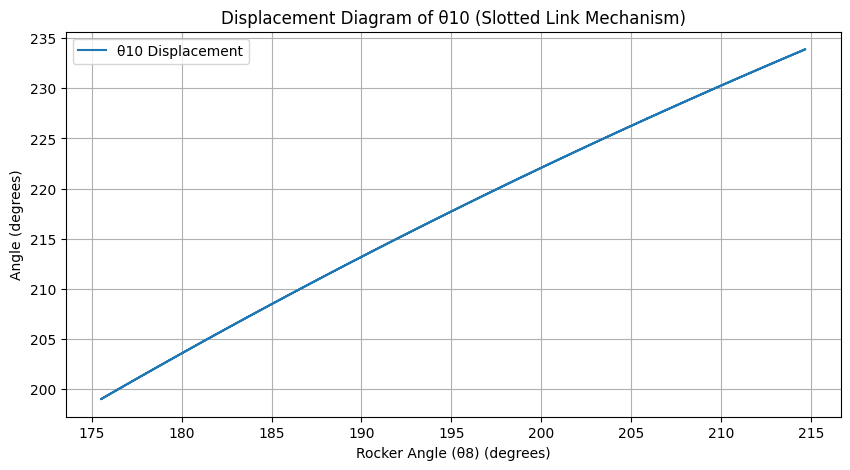

In [17]:
# For slotted link mechanism
#plot displacement diagram of theta10
plt.figure(figsize=(10, 5))
plt.plot(theta8_vals_deg, theta10_vals_deg, label='θ10 Displacement')
plt.xlabel("Rocker Angle (θ8) (degrees)")
plt.ylabel("Angle (degrees)")
plt.title("Displacement Diagram of θ10 (Slotted Link Mechanism)")
plt.legend()
plt.grid()
plt.savefig('mech2_1_dis_1.png', format='png')
plt.show()

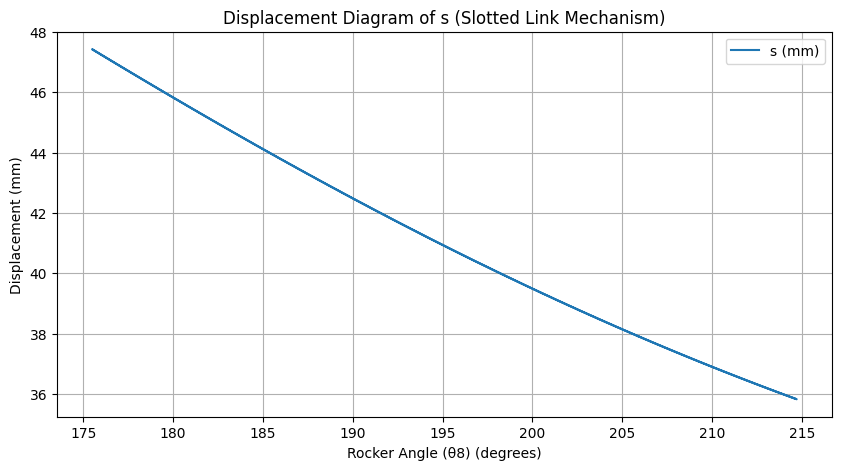

In [18]:
#plot displacement diagram of s
plt.figure(figsize=(10, 5))
plt.plot(theta8_vals_deg, s_vals, label='s (mm)')
plt.xlabel("Rocker Angle (θ8) (degrees)")
plt.ylabel("Displacement (mm)")
plt.title("Displacement Diagram of s (Slotted Link Mechanism)")
plt.legend()
plt.grid()
plt.savefig('mech2_1_dis_2.png', format='png')
plt.show()

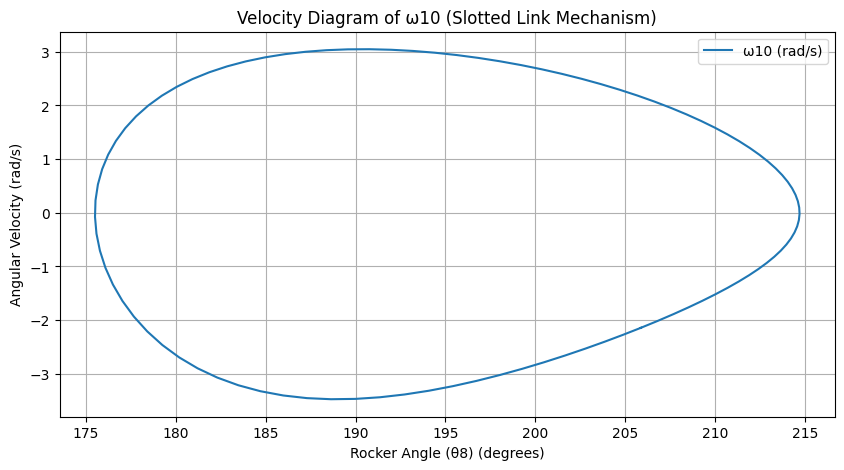

In [19]:
#plot velocity diagram of ω10
plt.figure(figsize=(10, 5))
plt.plot(theta8_vals_deg, omega10_vals, label='ω10 (rad/s)')
plt.xlabel("Rocker Angle (θ8) (degrees)")
plt.ylabel("Angular Velocity (rad/s)")
plt.title("Velocity Diagram of ω10 (Slotted Link Mechanism)")
plt.legend()
plt.grid()
plt.savefig('mech2_1_vel_1.png', format='png')
plt.show()

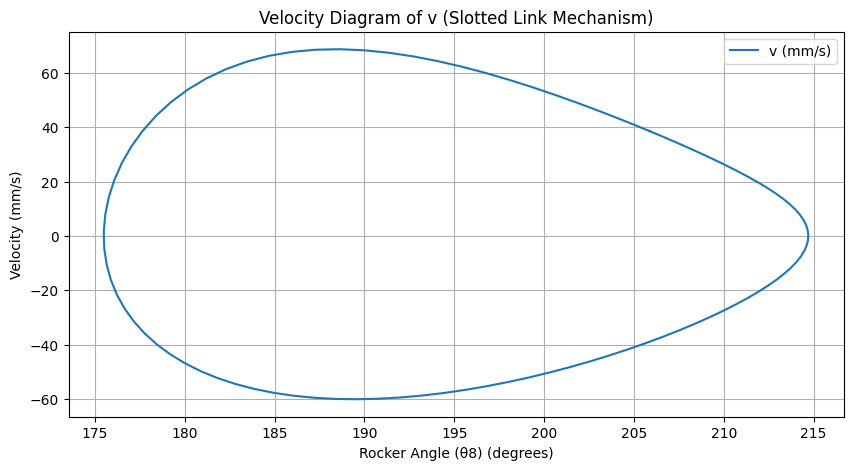

In [20]:
#plot velocity diagram of v
plt.figure(figsize=(10, 5))
plt.plot(theta8_vals_deg, v_vals, label='v (mm/s)')
plt.xlabel("Rocker Angle (θ8) (degrees)")
plt.ylabel("Velocity (mm/s)")
plt.title("Velocity Diagram of v (Slotted Link Mechanism)")
plt.legend()
plt.grid()
plt.savefig('mech2_1_vel_2.png', format='png')
plt.show()

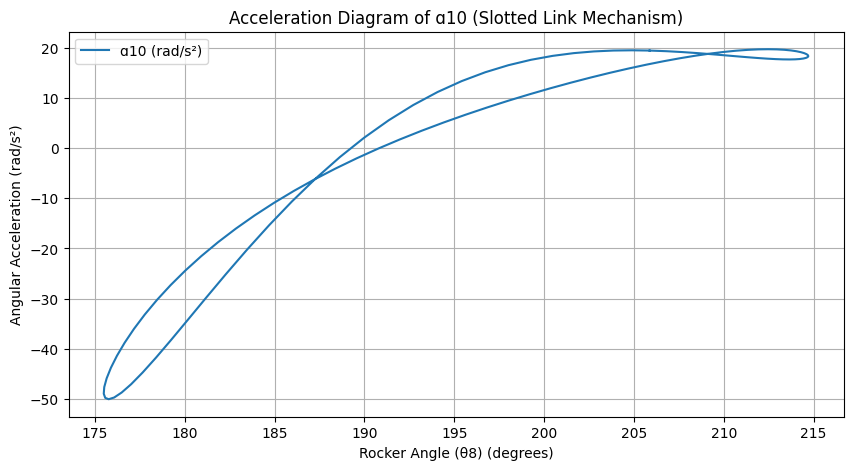

In [21]:
#plot acceleration diagram of ɑ10
plt.figure(figsize=(10, 5))
plt.plot(theta8_vals_deg, alpha10_vals, label='ɑ10 (rad/s²)')
plt.xlabel("Rocker Angle (θ8) (degrees)")
plt.ylabel("Angular Acceleration (rad/s²)")
plt.title("Acceleration Diagram of ɑ10 (Slotted Link Mechanism)")
plt.legend()
plt.grid()
plt.savefig('mech2_1_acc_1.png', format='png')
plt.show()

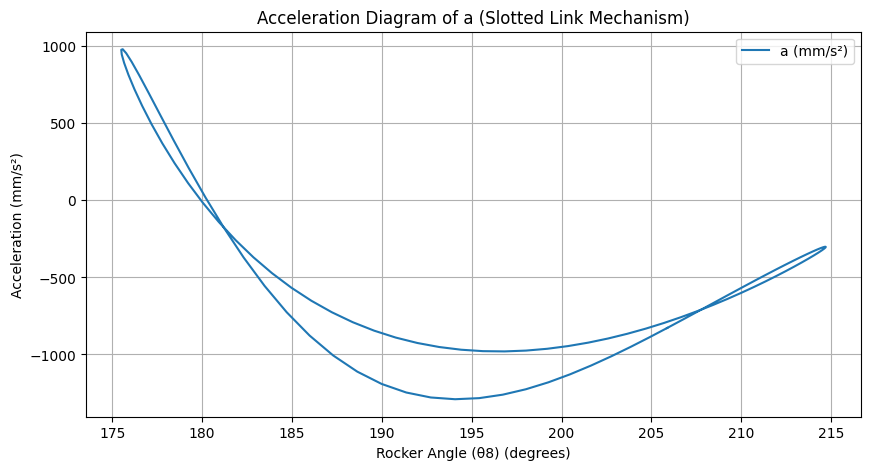

In [22]:
#plot acceleration diagram of a
plt.figure(figsize=(10, 5))
plt.plot(theta8_vals_deg, a_vals, label='a (mm/s²)')
plt.xlabel("Rocker Angle (θ8) (degrees)")
plt.ylabel("Acceleration (mm/s²)")
plt.title("Acceleration Diagram of a (Slotted Link Mechanism)")
plt.legend()
plt.grid()
plt.savefig('mech2_1_acc_2.png', format='png')
plt.show()